In [1]:
import numpy as np

In the new penguin colony of Waddlesworth there are 3 restaurants - The Tuxedo Diner, Fishtopia, and the new restaurant Black and White. Since penguins are social creatures, they all decide to eat at one of the restaurants in town every night of the week. If a penguin eats at the Tuxedo Diner on any night, they are 65% likely to return the next day, they are 10% likely to go to the Black and White the next day, and 5% likely to go to Fishtopia. There are similar probabilities for a penguin eating at one of the two other
restaurants that can be summarized
with the following diagram and matrix:


This matrix, known as a Markov matrix, tells us the probability that a given penguin changes from one state (restaurant) from one day to the next. It is read by columns. So for example, the 0.1 in the second row and first column says that if a penguin eats as the Tuxedo diner, there is a 10% chance that a penguin eats at the Black and White the next day. Notice that the columns all add up to 1 - this is consistent with the assumption that we will always find a penguin at one of the restaurants.


In [2]:
M = np.array([[.85, .15, .05], [.10, .65, .30], [.05, .2, .65]])
state_vector = np.array([30000, 50000, 20000]).reshape(1,-1) * 1/100000

### A.) M and M^2
-  Let’s call this matrix above M. Compute M2. What do you notice about the columns of M?

In [3]:
M

array([[0.85, 0.15, 0.05],
       [0.1 , 0.65, 0.3 ],
       [0.05, 0.2 , 0.65]])

In [4]:
# M * M
M @ M

array([[0.74  , 0.235 , 0.12  ],
       [0.165 , 0.4975, 0.395 ],
       [0.095 , 0.2675, 0.485 ]])

In [5]:
# M^2
np.linalg.matrix_power(M,2)

array([[0.74  , 0.235 , 0.12  ],
       [0.165 , 0.4975, 0.395 ],
       [0.095 , 0.2675, 0.485 ]])

### B.) Initial Population State 
- Suppose the colony of Waddlesworth has 100,000 inhabitants that all moved in today. Choose a distribution for how the penguins ate on the first day, i.e. x penguins ate at Tuxedo Diner, y penguins at at the Black and White, and z penguins at Fishtopia
- whatever you want, as long as these numbers add to 100,000. Put these values in a column vector (the numbers should match the order given in M). Now use the matrix M to determine the distribution of penguins at the different restaurants for the next 2 days.

In [6]:
# choose 30000 at TD, 50000 at BW, and 20000 at FT
initialPopulationState = np.array([30000, 50000, 20000]).reshape(1,-1)
#initialPopulationState = np.array([50000, 20000, 30000]).reshape(1,-1)

In [7]:
initialPopulationState

array([[30000, 50000, 20000]])

Distribution over the next 2 days:

In [8]:
# find distribution after two days (since M is the state change, multiply the initial state by M twice)
# intital staet * M * M = initial state * M^2
np.linalg.matrix_power(M,1) @ initialPopulationState.T

array([[34000.],
       [41500.],
       [24500.]])

In [9]:
# find distribution after two days (since M is the state change, multiply the initial state by M twice)
# intital staet * M * M = initial state * M^2
np.linalg.matrix_power(M,2) @ initialPopulationState.T

array([[36350.],
       [37725.],
       [25925.]])

### C.) Calculate state vector ( divide initialPopulationState by 100000)
- Now, for whatever vector you chose for the initial distribution in the previous step, divide each value by 100,000 to get the proportion of the population for each entry instead of the total number. Note that the entries should sum to 1. This vector is known as a probability state vector. Now multiply this vector by M and M2. What do you notice about the resulting vectors? How does this relate to the work you did in the last step?
    - multiply by M
    - multiply by M^2

In [10]:
# calc state vector by dividing initial pop state by total (10000)
state_vector = initialPopulationState / 100000
state_vector.T

array([[0.3],
       [0.5],
       [0.2]])

In [11]:
# state_vector * M
M @ state_vector.T

array([[0.34 ],
       [0.415],
       [0.245]])

In [12]:
# state_vector * M^2
np.linalg.matrix_power(M,2) @ state_vector.T

array([[0.3635 ],
       [0.37725],
       [0.25925]])

### D.) Calculate large power of M^n (n >= 20) and multiply by "initial state vector"
-  Use technology to calculate a large power of M (≥ 20) and multiply the vector from the previous step and note the results.

In [13]:
# calc large power of M (M^100)
np.linalg.matrix_power(M,100)

array([[0.41666667, 0.41666667, 0.41666667],
       [0.33333333, 0.33333333, 0.33333333],
       [0.25      , 0.25      , 0.25      ]])

In [14]:
# state vector * M^100
np.linalg.matrix_power(M,100) @ state_vector.T

array([[0.41666667],
       [0.33333333],
       [0.25      ]])

### E.) Eigenvalues
- Compute the eigenvalues of the matrix M. You are encouraged to use technology to aid you, but please show the work required to compute this. What do you notice about the eigenvalues? Do any stand out as interesting to you?
    - what do you notice?

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(M)

In [16]:
eigenvalues

array([1.  , 0.75, 0.4 ])

In [17]:
1 / np.sum(eigenvalues)

0.46511627906976766

In [18]:
0.75 / np.sum(eigenvalues)

0.34883720930232576

In [19]:
0.4 / np.sum(eigenvalues)

0.18604651162790709

### F.) Eigenvectors
- Now compute eigenvectors for each of the eigenvalues you found. Same as the last step, you are free to use technology to help with the row reductions required for computing the eigenvectors, but please show all work. Note: I prefer answers that are fractions because the work is more precise, but you’re free to use decimal approximations.

In [20]:
# normalized values as calculated by numpy
eigenvectors[:,0]

array([0.70710678, 0.56568542, 0.42426407])

In [21]:
# these values for eigenvecotors are non-normalized and are from an online calculator
eigenvectorsNonNormal = np.array([[5/3, -2, 1/3],[4/3, 1, -4/3],[1, 1, 1]])
eigenvectorsNonNormal

array([[ 1.66666667, -2.        ,  0.33333333],
       [ 1.33333333,  1.        , -1.33333333],
       [ 1.        ,  1.        ,  1.        ]])

In [22]:
# i am normalizing the first eigenvector just to make sure it matches with eigenvectors[:,0]
np.array([5/3, 4/3, 1]) / np.linalg.norm(np.array([5/3, 4/3, 1]))

array([0.70710678, 0.56568542, 0.42426407])

### G.) Diagonalize
- Now diagonalize the matrix M = PDP−1. Recall that Mn = PDnP−1. What will happen to the diagonal matrix D as n → ∞?

In [23]:
# Create a diagonal matrix with eigenvalues
D = np.diag(eigenvalues)

# Find the inverse of eigenvector matrix
P_inv = np.linalg.inv(eigenvectors)

# Diagonalize the matrix where eigenvectors = P
diagonalized_matrix = eigenvectors @ D @ P_inv

In [24]:
D

array([[1.  , 0.  , 0.  ],
       [0.  , 0.75, 0.  ],
       [0.  , 0.  , 0.4 ]])

In [25]:
diagonalized_matrix

array([[0.85, 0.15, 0.05],
       [0.1 , 0.65, 0.3 ],
       [0.05, 0.2 , 0.65]])

As n approaches, infinity, D will converge to a 3x3 matrix with a single leading entry, 1, in the first row and all zeros. 

### H.) Divide each eigenvector by the sum of the entries
- Before continuing to the next steps, divide each eigenvector by the sum of the entries, so that the entries sum to 1 (like you did in (c)). We’ll come back to this later.

In [26]:
eigenvectorsNonNormal

array([[ 1.66666667, -2.        ,  0.33333333],
       [ 1.33333333,  1.        , -1.33333333],
       [ 1.        ,  1.        ,  1.        ]])

In [27]:
# take note of this for later
eigenvectorsNonNormal[:,0] / np.sum(eigenvectorsNonNormal[:,0])

array([0.41666667, 0.33333333, 0.25      ])

### I. & J.) What happens when...
- Let’s call whatever you chose for your initial state vector in part (c) v 0. 
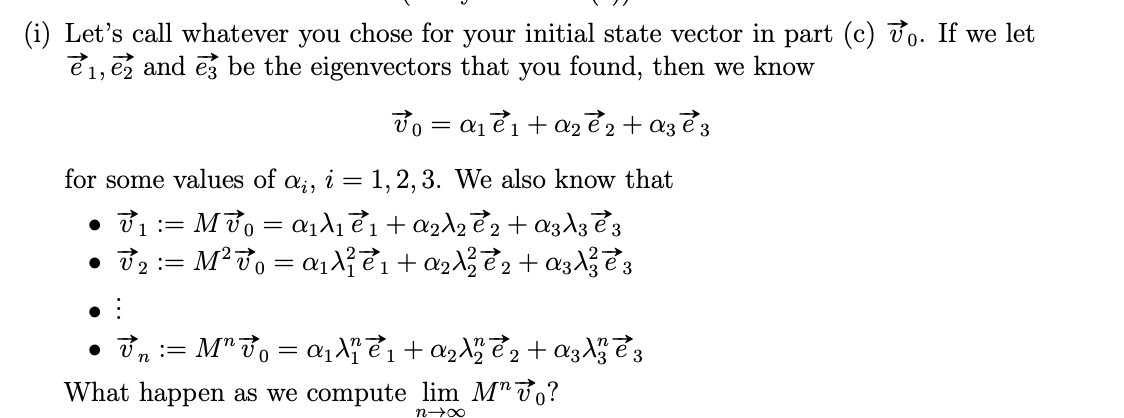

n approaches infinity for state_vector * M^n

In [28]:
A = eigenvectorsNonNormal
b = state_vector.T
alpha_coefficients = np.linalg.solve(A, b)

In [29]:
alpha_coefficients

array([[ 0.25      ],
       [ 0.04285714],
       [-0.09285714]])

In [30]:
alpha1 = alpha_coefficients[0]
alpha2 = alpha_coefficients[1]
alpha3 = alpha_coefficients[2]

In [31]:
f'alpha{1}'

'alpha1'

In [32]:
# using equation, double check result IF we solve for the alpha coefficients
n = 100

term1 = alpha1 * eigenvectorsNonNormal[:,0] * eigenvalues[0]**n 
term2 = alpha2 * eigenvectorsNonNormal[:,1] * eigenvalues[1]**n
term3 = alpha3 * eigenvectorsNonNormal[:,2] * eigenvalues[2]**n

term1 + term2 + term3

array([0.41666667, 0.33333333, 0.25      ])

In [33]:
eigenvalues

array([1.  , 0.75, 0.4 ])

In [34]:
eigenvectorsNonNormal[:,0]

array([1.66666667, 1.33333333, 1.        ])

In [35]:
alpha1 * eigenvectorsNonNormal[:,0] * 1

array([0.41666667, 0.33333333, 0.25      ])

Here, we see that the first coefficent of state_vector = eigeneectorsNonNormal*alpha_coefficients 
- is alpha1 = 0.25

As n approaches infinity, the state, v_n, will converge to alpha1*eigenvalues[0]*eigeneectorsNonNormal[0] since the other terms of the corresponding eigenvalues^n will become zero since the eigenvalues are less than 1

### J.) We know that the entries of v n need to add up to 1. Based off the results of the #» n #»
- last step, how can we compute v ∞ = lim M v n? (Food for thought - why didn’t n→∞
we need to find what the αi were?)
- since M^n = np.array([[1,0,0],[0,0,0],[0,0,0]]) as n approaches infinity, all you have to do is multiply the v0 by np.array([[1,0,0],[0,0,0],[0,0,0]])

In [36]:
np.array([[1,0,0],[0,0,0],[0,0,0]])

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [37]:
# as n approaches infinity, it is equal to this: 
eigenvectors @ np.linalg.matrix_power(D,365) @ P_inv

array([[0.41666667, 0.41666667, 0.41666667],
       [0.33333333, 0.33333333, 0.33333333],
       [0.25      , 0.25      , 0.25      ]])

In [38]:
# or more simply: 
eigenvectors @ np.array([[1,0,0],[0,0,0],[0,0,0]]) @ P_inv

array([[0.41666667, 0.41666667, 0.41666667],
       [0.33333333, 0.33333333, 0.33333333],
       [0.25      , 0.25      , 0.25      ]])

In [39]:
# v0 * M^n as n approaches infinity
(eigenvectors @ np.array([[1,0,0],[0,0,0],[0,0,0]]) @ P_inv) @ state_vector.T

array([[0.41666667],
       [0.33333333],
       [0.25      ]])

In [40]:
state_vector.T

array([[0.3],
       [0.5],
       [0.2]])

### K.) Steady State Vector
- Compare this vector to the ones you got in part (h). What do you notice? This
vector is known as the steady state vector for the given Markov model.

In [41]:
# as explained above, as n approaches infinity, this cell will be the converged result
# this is the steady-state vector and should be the same to the one found in H
alpha1*eigenvalues[0]*eigenvectorsNonNormal[:,0]

array([0.41666667, 0.33333333, 0.25      ])

In [42]:
# therefore, a big value like v_100 should approach the steady-state vector found in K and H
v_100 = np.linalg.matrix_power(M,100) @ state_vector.T
v_100

array([[0.41666667],
       [0.33333333],
       [0.25      ]])

### L.) How many penguins at Tux Diner after a year (a long time) ?
- How many penguins would you expect to see at the Tuxedo Diner in one year (assuming the population of penguins hasn’t changed).

In [43]:
v_365 = np.linalg.matrix_power(M,365) @ state_vector.T
penguinDistribution_365Days = v_365 * 100000
tuxDiner = int(penguinDistribution_365Days[0][0])
print(f'{tuxDiner} Penguins at Tuxedo Diner after 365 days.')

41666 Penguins at Tuxedo Diner after 365 days.


In [44]:
100000 * v_365

array([[41666.66666667],
       [33333.33333333],
       [25000.        ]])